In [1]:
import pandas as pd
import os
import sys
import clumpsptm
import pymol
from tqdm import tqdm
import glob
from typing import Union
import matplotlib.pyplot as plt
import numpy as np
import ast

## 1. Aggregate Result Files
---

In [2]:
results_df = list()

for file in tqdm(glob.glob("clumpsptm_runs/**/*.tsv")):
    _df = pd.read_csv(file, sep='\t', index_col=0)
    _df['id'] = file.split('/')[1]
    results_df.append(_df)
    
results_df = pd.concat(results_df)

100%|██████████| 28/28 [00:00<00:00, 69.98it/s]


In [3]:
res = list()

for idx in tqdm(np.unique(results_df['id'])):
    _df = results_df[results_df['id']==idx].drop(columns=['fdr_max_pval','fdr_pass','fdr_corr'])
    _df = clumpsptm.utils.add_corrected_fdr(_df, 0.1)
    res.append(_df)

# Set back to 0.1 threshold
results_df = pd.concat(res)

100%|██████████| 28/28 [00:01<00:00, 24.31it/s]


In [4]:
res = list()

for idx in tqdm(np.unique(results_df['id'])):
    _df = results_df[results_df['id']==idx].drop(columns=['fdr_max_pval','fdr_pass','fdr_corr'])
    _df = clumpsptm.utils.add_corrected_fdr(_df, 0.1, weight_thresh_by_n=True)
    res.append(_df)
    
results_01_weight_df = pd.concat(res)

100%|██████████| 28/28 [00:01<00:00, 26.25it/s]


In [5]:
# Highlight any hits that are derived from a singular peptide
df = pd.read_csv("ref_uniprot_072522/full_mapped_sites_to_pdbs.tsv", sep='\t', index_col=0)
acc_var_df = df[['accession_number','variableSites']].reset_index().set_index("accession_number").drop_duplicates()

def traceback_peptide3s(row):
    """Traceback peptide 3s"""
    from ast import literal_eval
    
    if row['clumpsptm_input_n'] != 3:
        return None
    else:
        vs3 = {x if len(x.split(" ")) == 3 else None for x in literal_eval(row['variableSites'])}.pop()
        try:
            return acc_var_df[acc_var_df['variableSites']==vs3].loc[row.name]['id']
        except:
            return None
        
results_df['trace3s'] = results_df.apply(traceback_peptide3s,1).values

In [6]:
results_df.to_csv("CPTAC_PanCan_clumpsptm_output.tsv", sep="\t")

## 2. Create DotPlots
---

In [7]:
def plot_pair(group, results_df, n_to_plot=20):
    """Plot paring."""
    fig, axes = plt.subplots(2, 2, figsize=(10,14))
    
    for j,feature in enumerate(['acetylome','phosphoproteome']):
        for i,direction in enumerate(['negative','positive']):
            _df = results_df[results_df['id']=="{}_{}".format(group, direction)]
            clumpsptm.vis.dotplot(
                _df.loc[_df[_df['clumpsptm_sampler']==feature].sort_values(
                    "clumpsptm_pval").iloc[:n_to_plot,:].index],
                sort_by=feature,
                x='clumpsptm_pval',
                ax=axes[i,j],
                thresh=0.1,
            )
            
            axes[i,j].legend().remove()
            axes[i,j].set_yticklabels(axes[i,j].get_yticklabels(), fontsize=14)
            axes[i,j].set_xlabel(r"$-log_{10}$ p-value", fontsize=16)
            
            if direction=='positive': direction = "(+)"
            if direction=='negative': direction = "(-)"
                
            axes[i,j].set_title("{} {}".format(feature.capitalize(), direction), fontsize=18)
            axes[i,j].set_yticklabels(axes[i,j].get_yticklabels(), fontsize=14)

    plt.suptitle(group, x=0.55, y=1.025, fontsize=20)
    plt.tight_layout()

In [8]:
os.makedirs('figures', exist_ok=True)
os.makedirs('figures/pymol', exist_ok=True)
os.makedirs('figures/dotplots', exist_ok=True)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


No Nominal P-Values < 0.1
No Nominal P-Values < 0.1
No Nominal P-Values < 0.1
No Nominal P-Values < 0.1


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


No Nominal P-Values < 0.1
No Nominal P-Values < 0.1
No Nominal P-Values < 0.1
No Nominal P-Values < 0.1


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


No Nominal P-Values < 0.1
No Nominal P-Values < 0.1
No Nominal P-Values < 0.1
No Nominal P-Values < 0.1


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


No Nominal P-Values < 0.1
No Nominal P-Values < 0.1
No Nominal P-Values < 0.1
No Nominal P-Values < 0.1


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


No Nominal P-Values < 0.1
No Nominal P-Values < 0.1
No Nominal P-Values < 0.1
No Nominal P-Values < 0.1


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


No Nominal P-Values < 0.1
No Nominal P-Values < 0.1
No Nominal P-Values < 0.1
No Nominal P-Values < 0.1


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


No Nominal P-Values < 0.1
No Nominal P-Values < 0.1
No Nominal P-Values < 0.1
No Nominal P-Values < 0.1


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


No Nominal P-Values < 0.1
No Nominal P-Values < 0.1
No Nominal P-Values < 0.1
No Nominal P-Values < 0.1


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


No Nominal P-Values < 0.1
No Nominal P-Values < 0.1
No Nominal P-Values < 0.1
No Nominal P-Values < 0.1


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


No Nominal P-Values < 0.1
No Nominal P-Values < 0.1
No Nominal P-Values < 0.1
No Nominal P-Values < 0.1


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


No Nominal P-Values < 0.1
No Nominal P-Values < 0.1
No Nominal P-Values < 0.1
No Nominal P-Values < 0.1


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


No Nominal P-Values < 0.1
No Nominal P-Values < 0.1
No Nominal P-Values < 0.1
No Nominal P-Values < 0.1


No handles with labels found to put in legend.
No handles with labels found to put in legend.


No Nominal P-Values < 0.1
No Nominal P-Values < 0.1


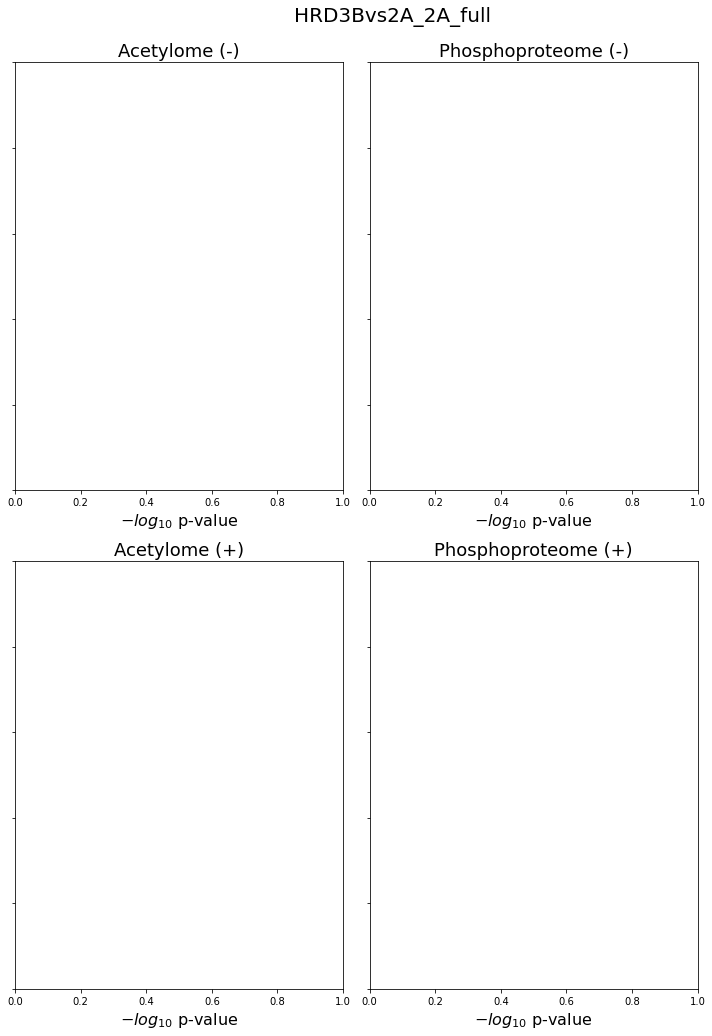

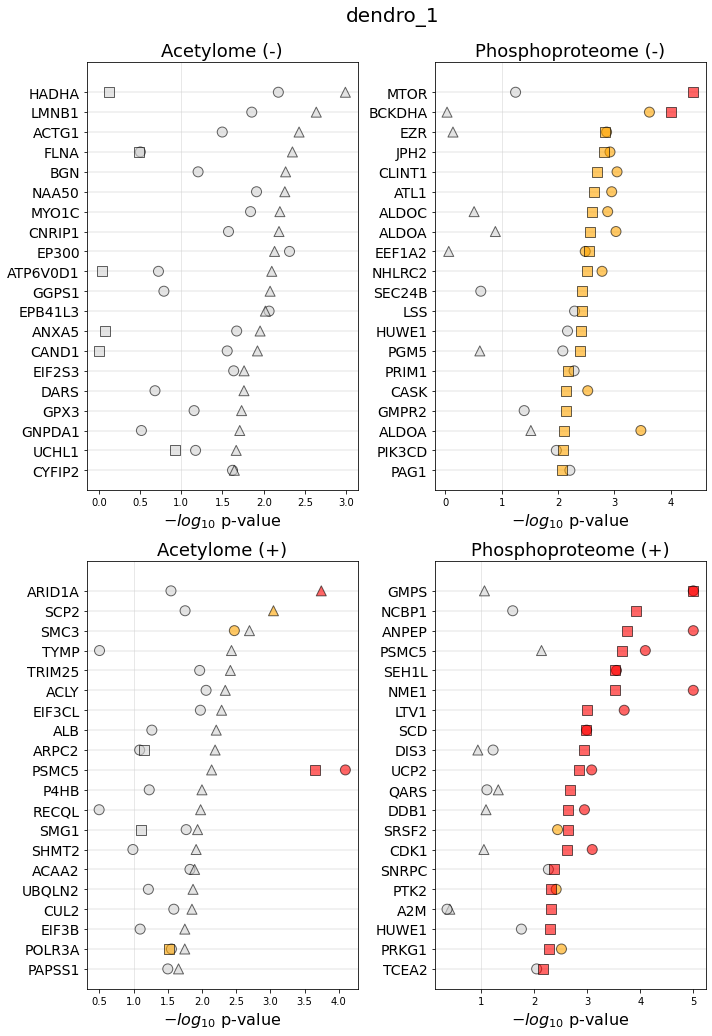

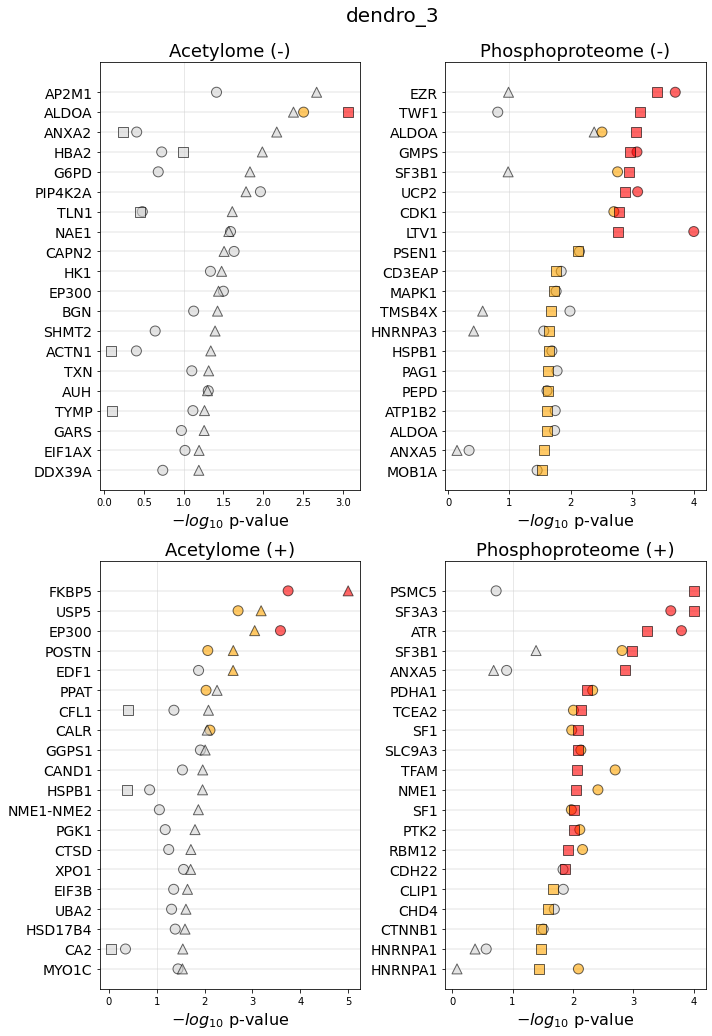

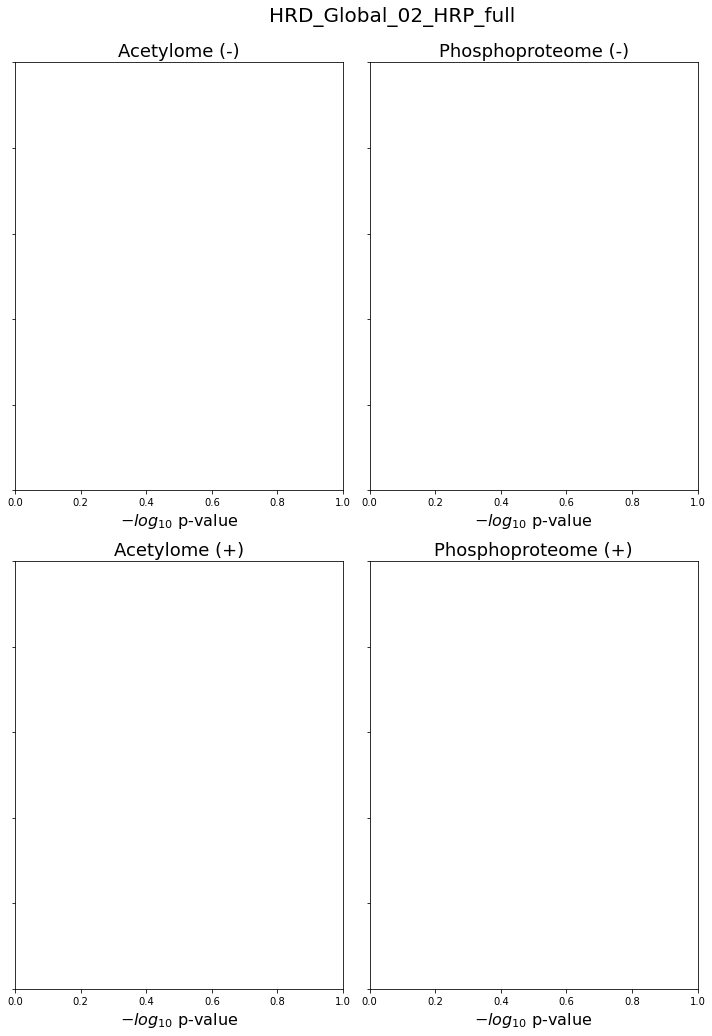

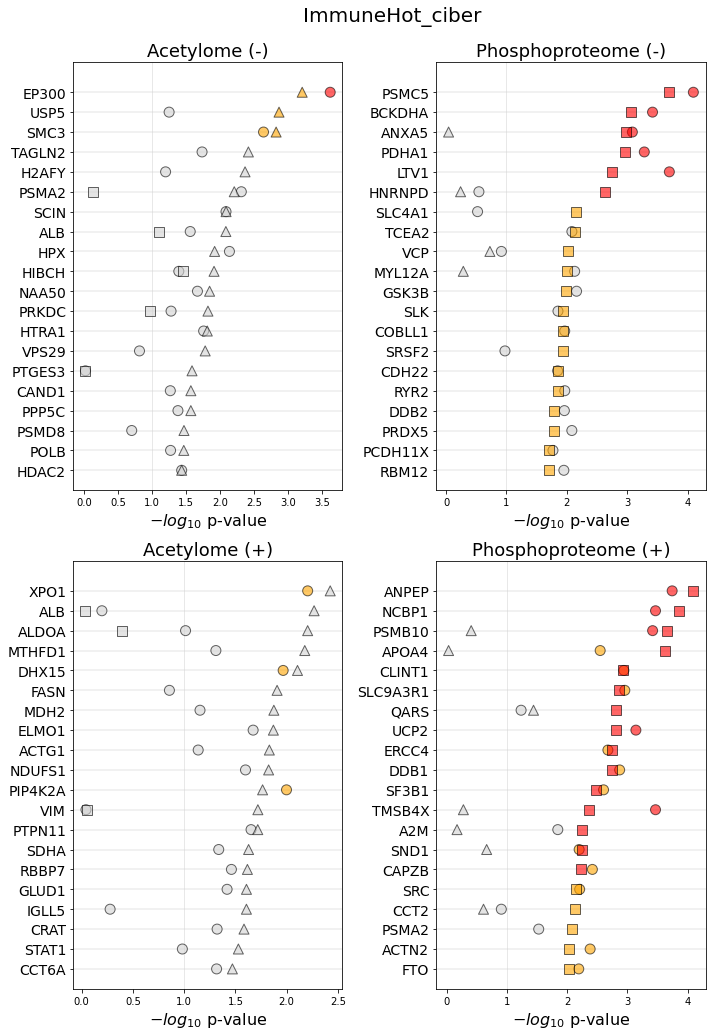

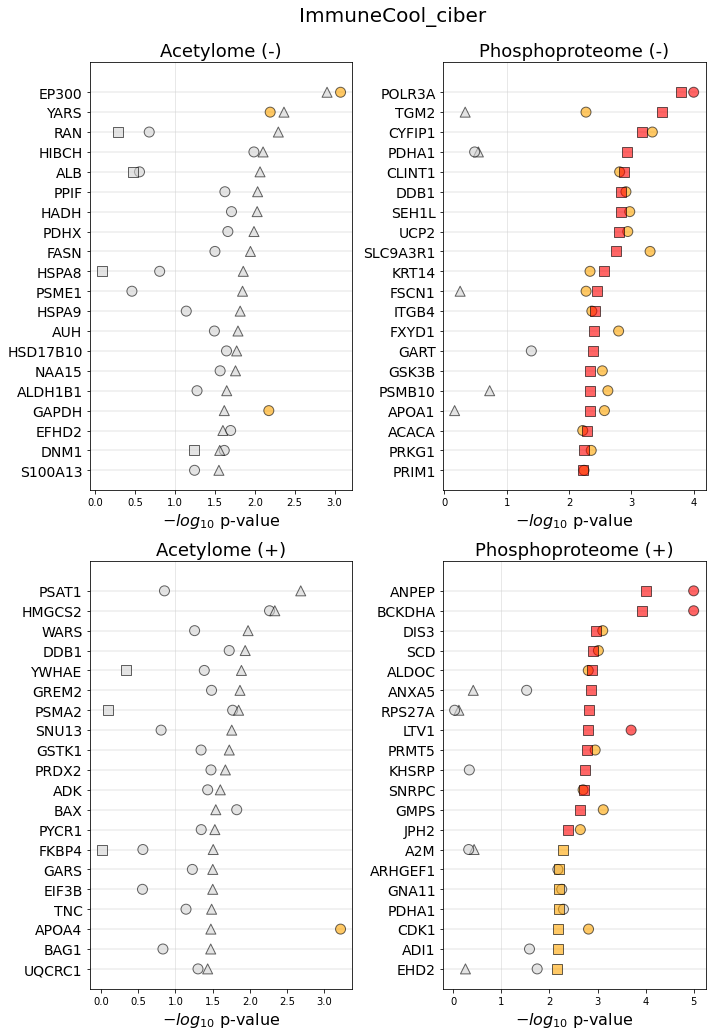

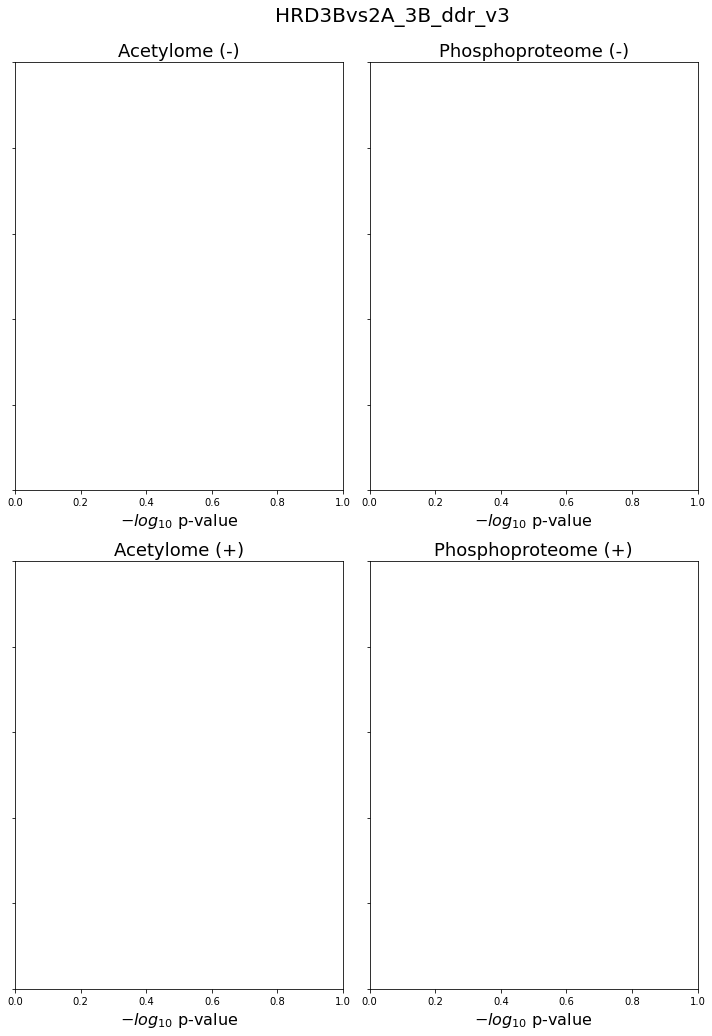

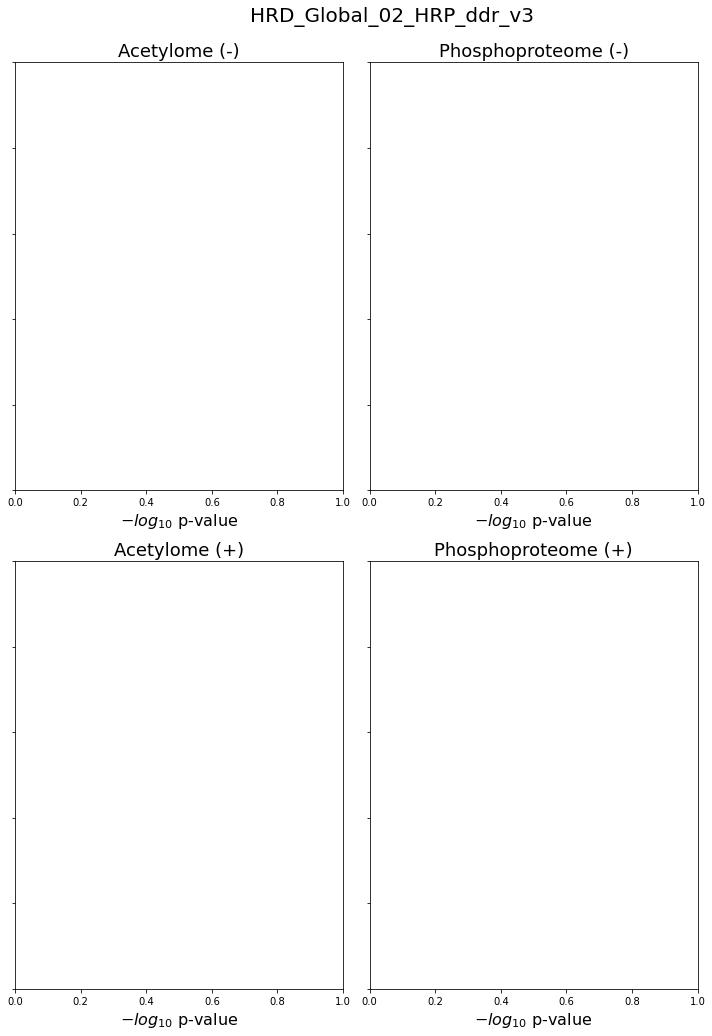

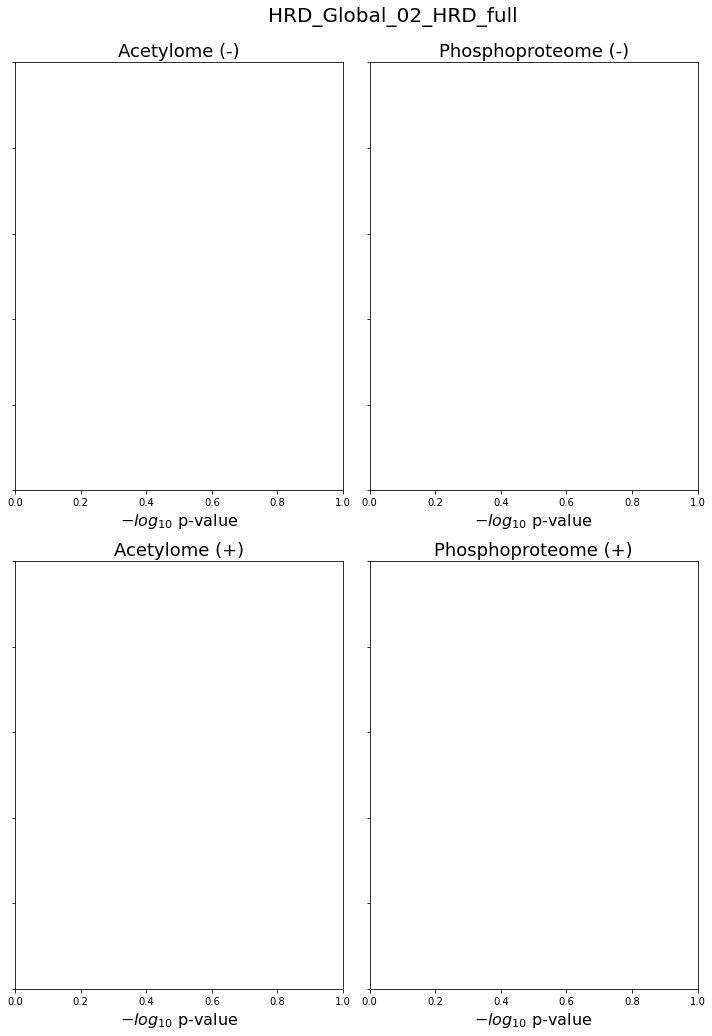

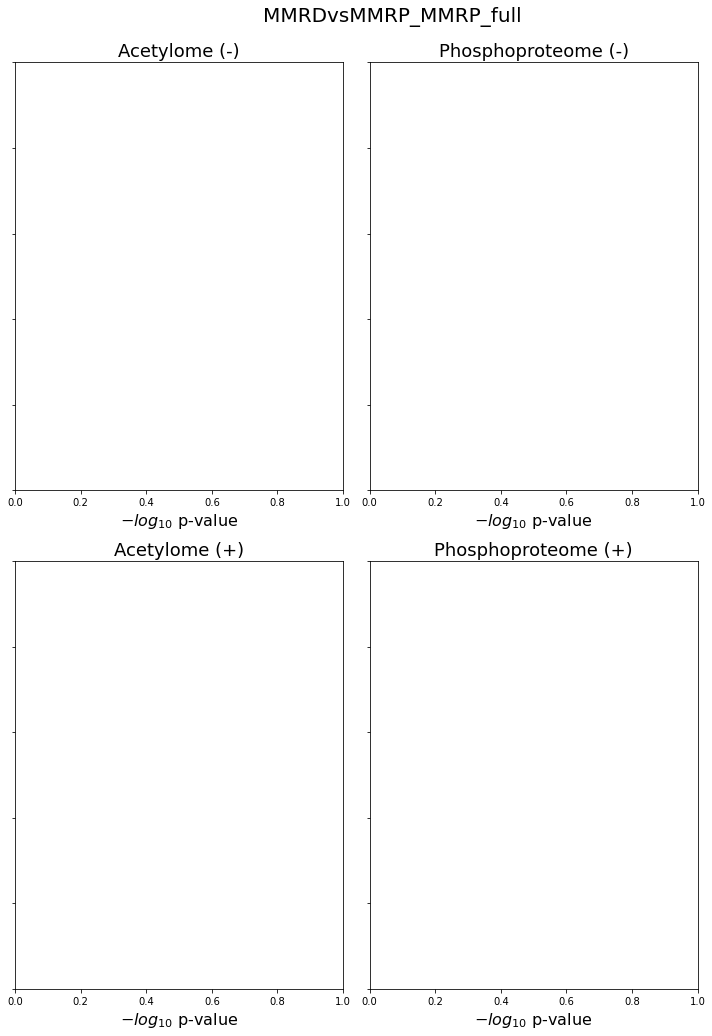

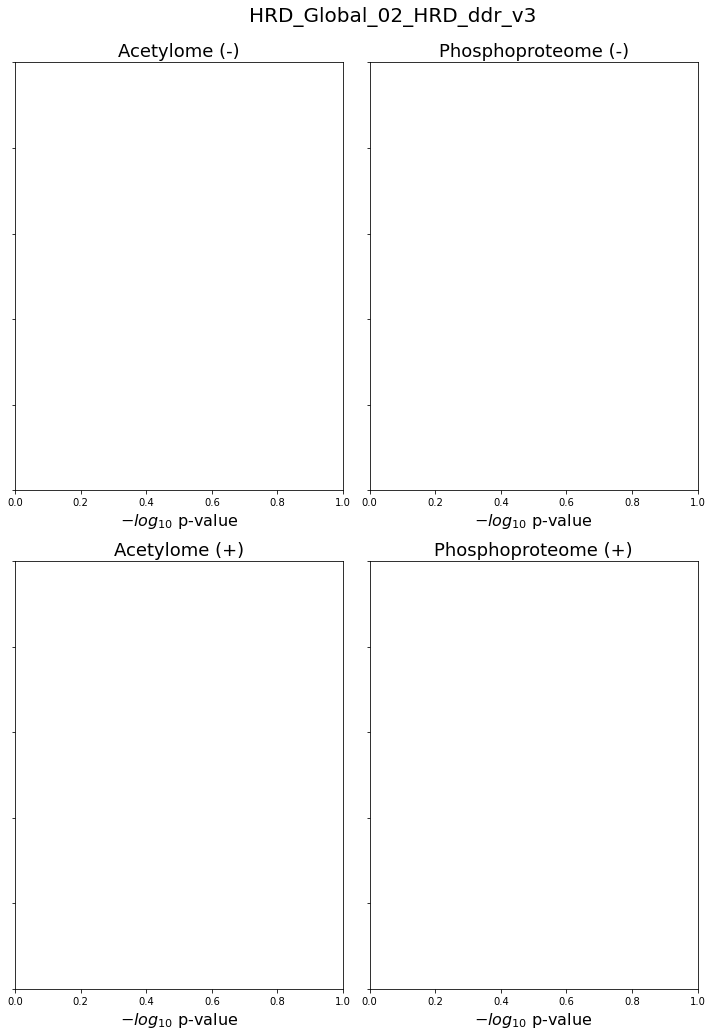

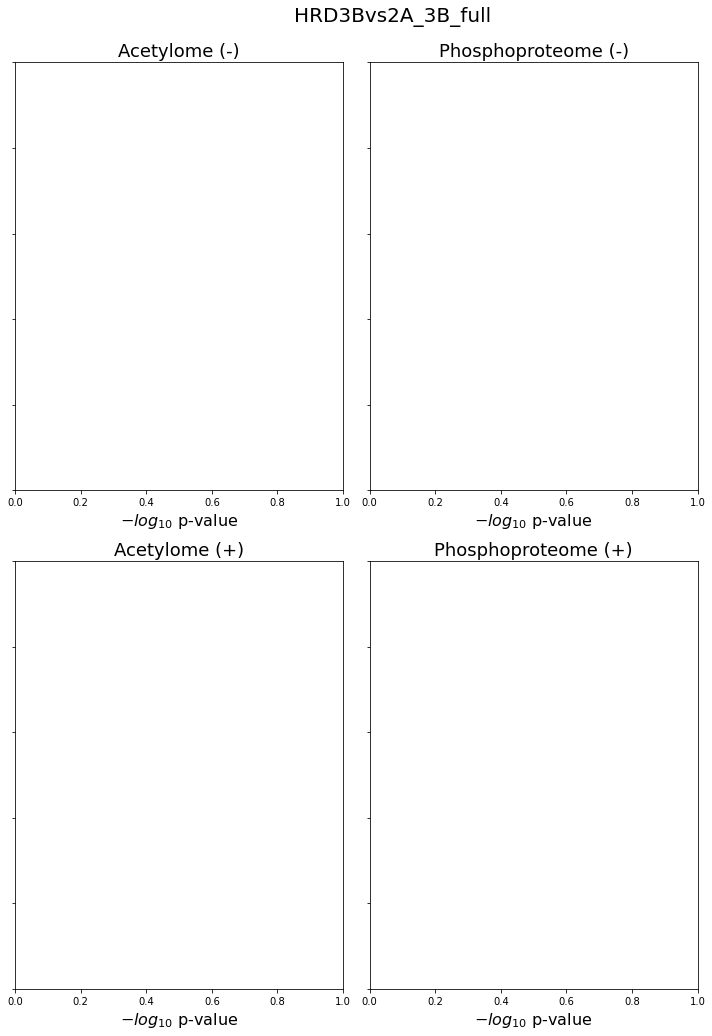

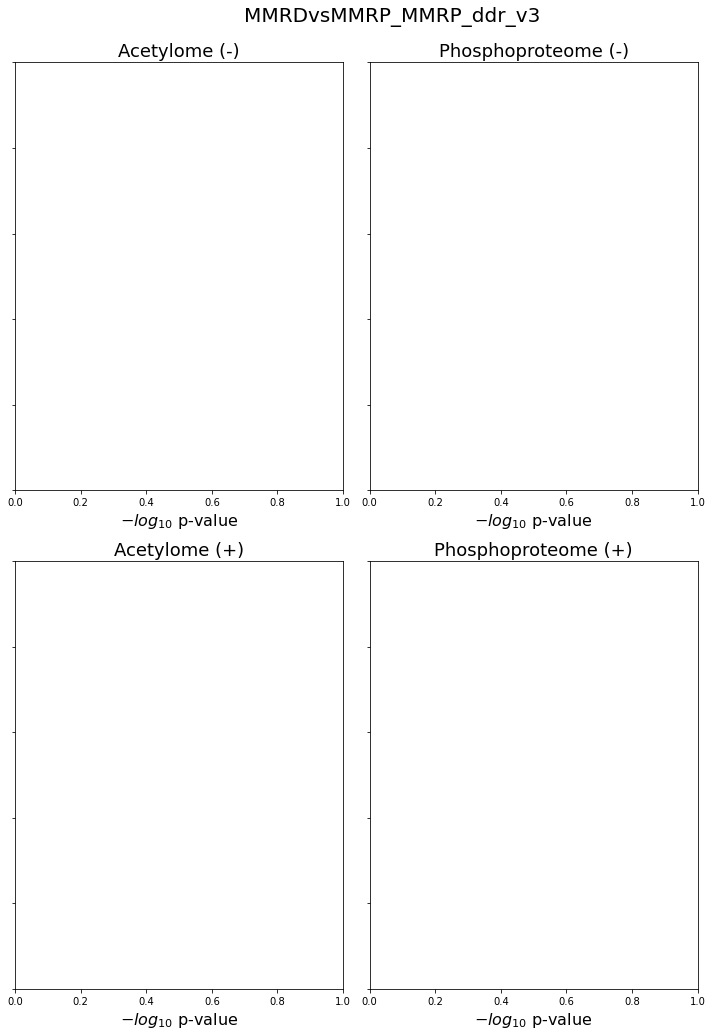

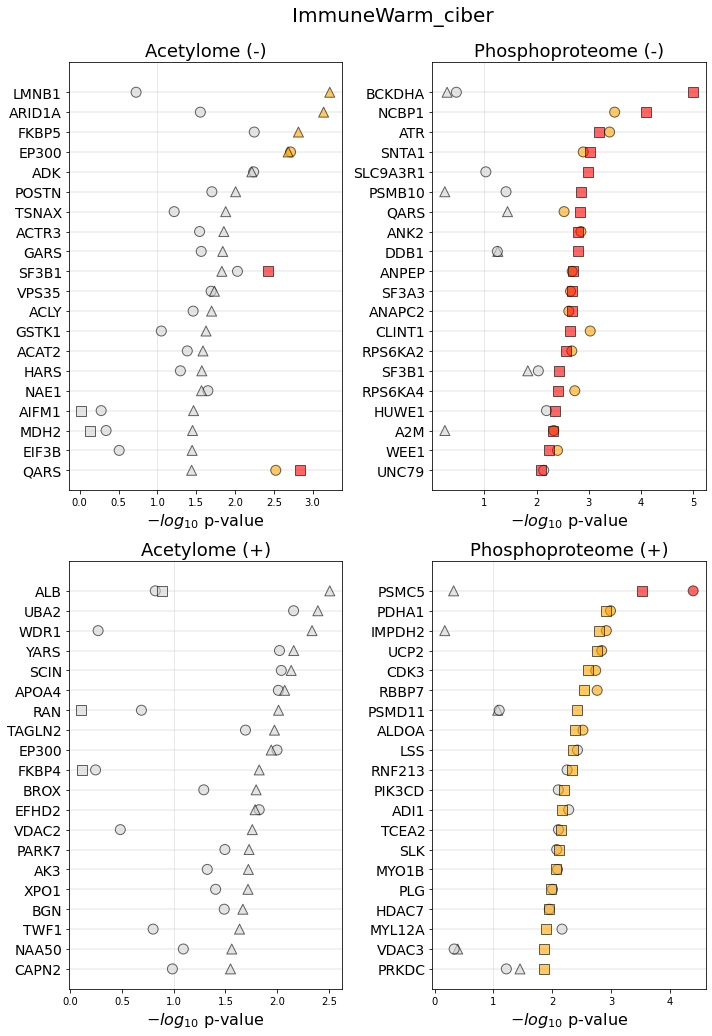

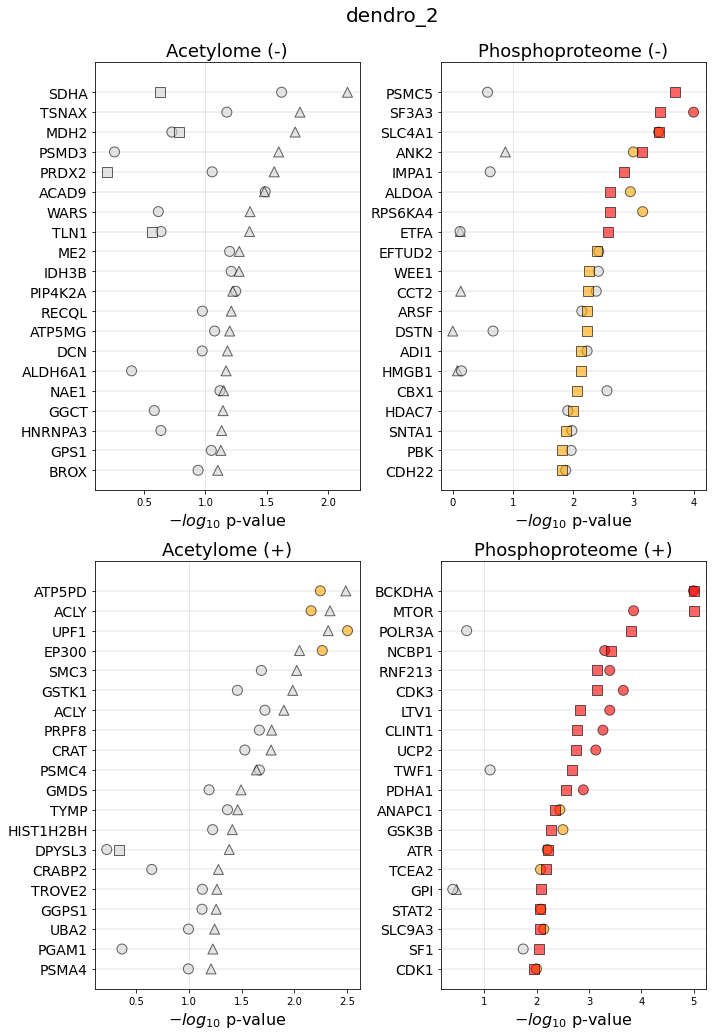

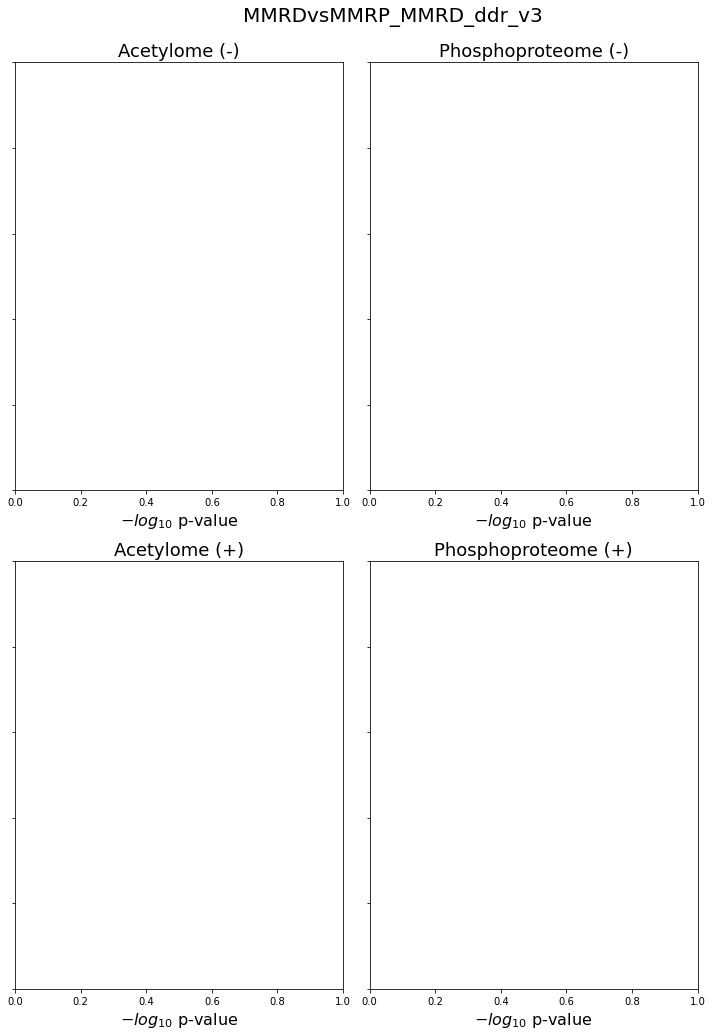

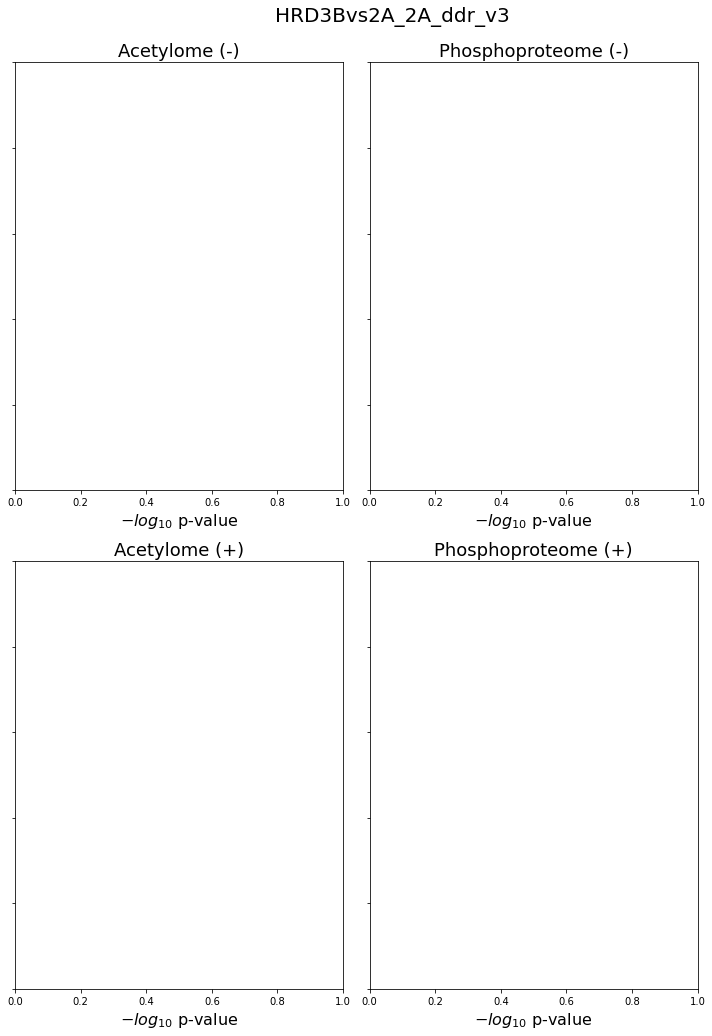

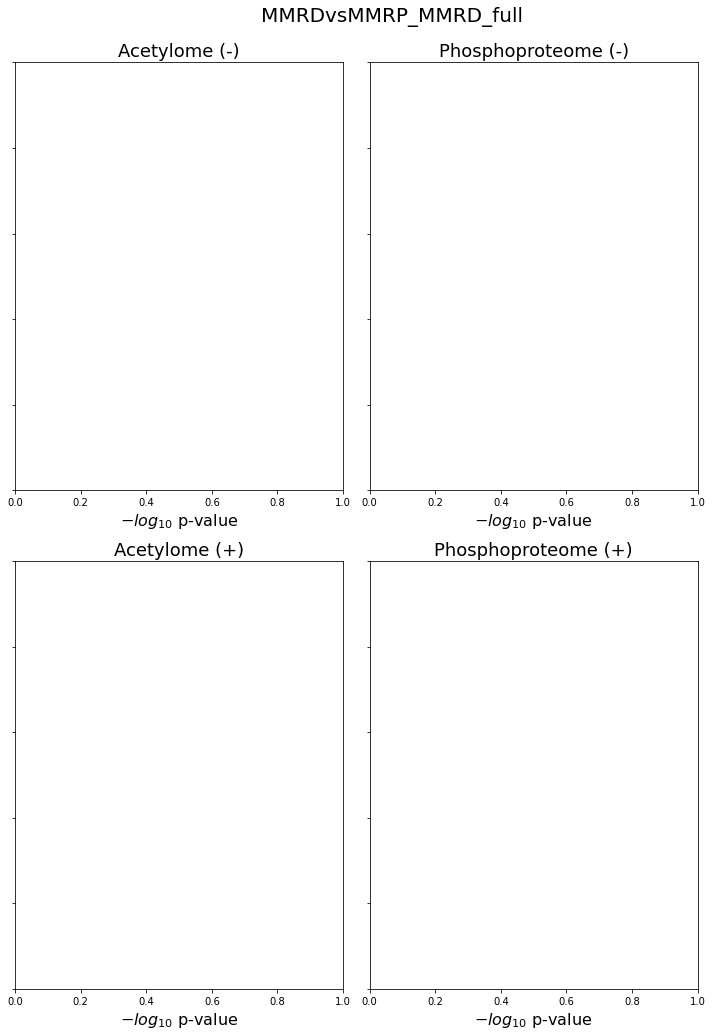

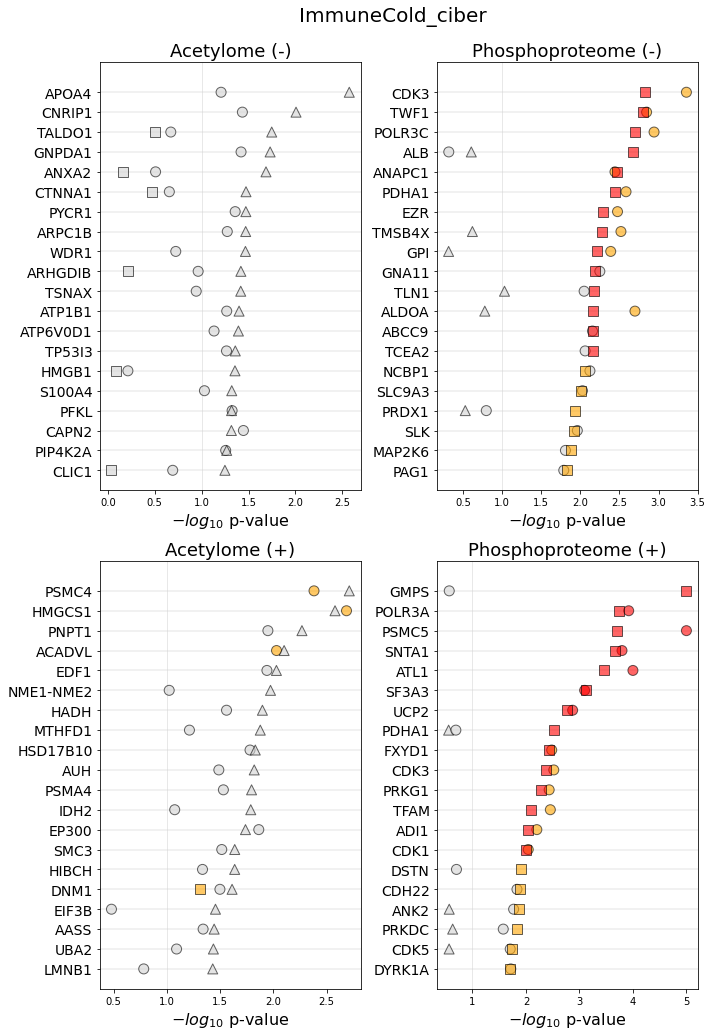

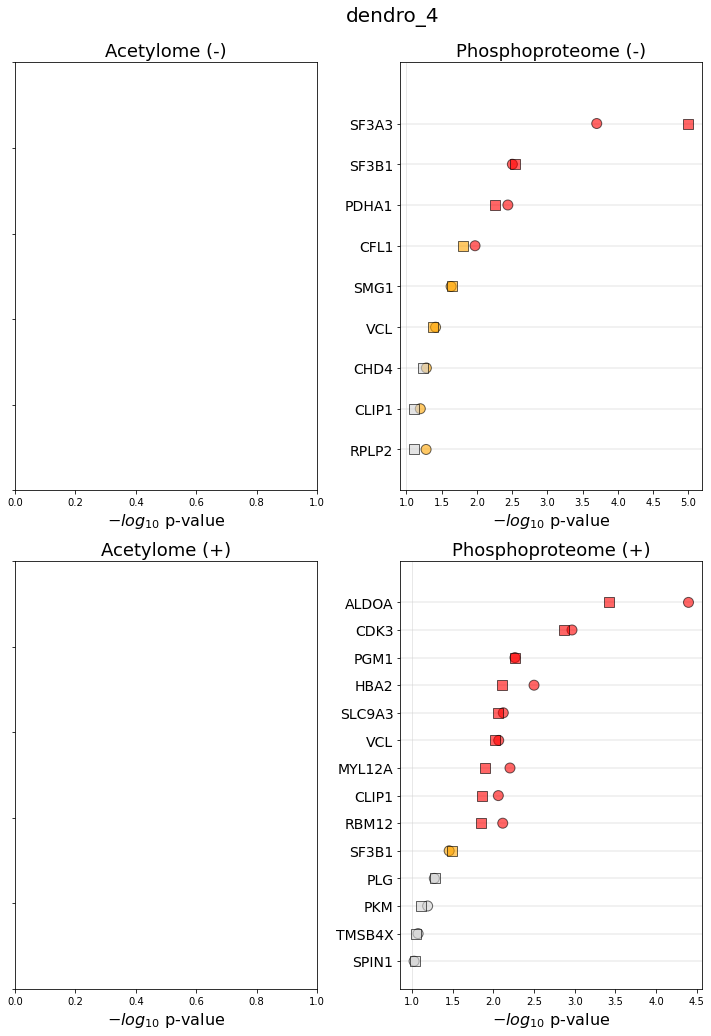

In [9]:
for group in {x.replace("_negative","").replace("_positive","") for x in np.unique(results_df['id'])}:
    plot_pair(group, results_df)
    plt.savefig(os.path.join("figures/dotplots", "{}_dotplot.pdf".format(group)), dpi=300, bbox_inches='tight')

In [1]:
## Creation of Pymol Files
## --------------------------

# for group in np.unique(results_df['id']):
#     os.makedirs(os.path.join('figures/pymol', group), exist_ok=True)
    
#     for feat in np.unique(results_df['clumpsptm_sampler']):
#         _df = results_df[(results_df['id']==group) & 
#                          (results_df['clumpsptm_sampler']==feat)
#                         ].sort_values('clumpsptm_pval').reset_index()
#         _df.index = _df.index.astype(str)
#         _out_dir = os.path.join('figures/pymol',group,feat)
#         clumpsptm.vis.create_pymols_from_result(_df, out_dir=_out_dir, include_idx_in_name=True)

In [10]:
def color_axes(ax, match_list, color='red'):
    """Color axes labels."""
    
    for lab in ax.get_yticklabels():
        if lab.get_text() in match_list:
            lab.set_color(color)

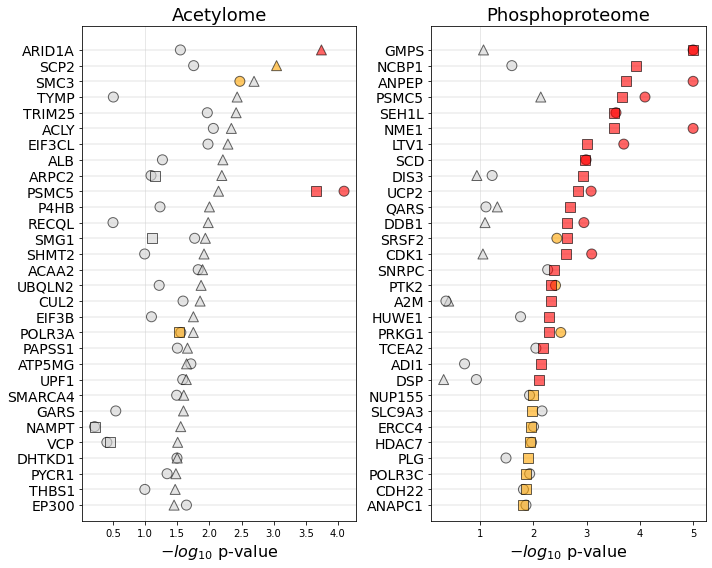

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(10,8))

n_to_plot = 30

_df = results_df[results_df['id']=="dendro_1_positive"]
_df_acetylome = _df.loc[_df[_df['clumpsptm_sampler']=="acetylome"].sort_values("clumpsptm_pval").iloc[:n_to_plot,:].index]
clumpsptm.vis.dotplot(
    _df_acetylome,
    sort_by="acetylome",
    x='clumpsptm_pval',
    ax=axes[0],
    thresh=0.1,
)

_df_phosphoproteome = _df.loc[_df[_df['clumpsptm_sampler']=="phosphoproteome"].sort_values("clumpsptm_pval").iloc[:n_to_plot,:].index]
clumpsptm.vis.dotplot(
    _df_phosphoproteome,
    sort_by="phosphoproteome",
    x='clumpsptm_pval',
    ax=axes[1],
    thresh=0.1,
)

axes[0].legend().remove()
axes[0].set_yticklabels(axes[0].get_yticklabels(), fontsize=14)
axes[0].set_xlabel(r"$-log_{10}$ p-value", fontsize=16)
axes[0].set_yticklabels(axes[0].get_yticklabels(), fontsize=14)
axes[0].set_title("Acetylome", fontsize=18)

axes[1].legend().remove()
axes[1].set_yticklabels(axes[1].get_yticklabels(), fontsize=14)
axes[1].set_xlabel(r"$-log_{10}$ p-value", fontsize=16)
axes[1].set_yticklabels(axes[1].get_yticklabels(), fontsize=14)
axes[1].set_title("Phosphoproteome", fontsize=18)

# Highlight triple peptide classes
_acetyl_trace3 = _df_acetylome[
    (_df_acetylome['clumpsptm_sampler']=='acetylome') & 
    (_df_acetylome['trace3s'].notna())]['geneSymbol'].values

_phospho_trace3 = _df_phosphoproteome[
    (_df_phosphoproteome['clumpsptm_sampler']=='phosphoproteome') & 
    (_df_phosphoproteome['trace3s'].notna())]['geneSymbol'].values

# color_axes(axes[0], _acetyl_trace3)
# color_axes(axes[1], _phospho_trace3)

plt.tight_layout()
plt.savefig("figures/dendro1_fig2.pdf", dpi=300, bbox_inches='tight')

## Figure S2E Sankey
---

In [16]:
sites_df = pd.read_csv("ref_uniprot_072522/full_mapped_sites_to_pdbs.tsv", sep='\t', index_col=0)
acc_df = pd.read_csv("ref_uniprot_072522/mapped_accession_to_sifts.tsv", sep="\t", index_col=0)

In [15]:
import plotly.graph_objects as go

In [52]:
s = sites_df[sites_df['pdb_res_match']].groupby('accession_number').size()
s.name = 'n_mapped_sites'

In [53]:
acc_df = acc_df.join(s)

In [69]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = [
          "Sequence (n={})".format(acc_df.shape[0]), 
          "Blast Hit (n={})".format(acc_df[acc_df['blast']].shape[0]), 
          "No Blast Hit", 
          "Matching SIFTS (n={})".format(acc_df[acc_df['sifts']==True].shape[0]), 
          "No Matching SIFTS",
          "Matched PDB (n={})".format(acc_df[acc_df['n_mapped_sites'].notna()].shape[0]), 
          "No Matched PDB",
          "PDBs >= 3 Sites (n={})".format(acc_df[acc_df['n_mapped_sites']>=3].shape[0]), 
          "PDBs < 3 Sites"
      ],
    ),
    link = dict(
      source = [0,0,1,1,3,3,5,5],
      target = [1,2,3,4,5,6,7,8],
      value = [
          acc_df[acc_df['blast']].shape[0],
          acc_df[~acc_df['blast']].shape[0],
          acc_df[acc_df['sifts']==True].shape[0],
          acc_df[acc_df['sifts']==False].shape[0],
          acc_df[acc_df['n_mapped_sites'].notna()].shape[0],
          acc_df[acc_df['n_mapped_sites'].isna()].shape[0],
          acc_df[acc_df['n_mapped_sites']>=3].shape[0],
          acc_df[acc_df['n_mapped_sites']<3].shape[0]
      ]
  ))])

fig.update_layout(title_text="CPTAC Proteins (Accession Numbers)", font_size=10)
fig.show()
fig.write_image("S2E_cptac_protein.svg")

In [85]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = [
          "Acetylome (n={})".format(sites_df.groupby('feature').size()['acetylome']), 
          "Phosphoproteome (n={})".format(sites_df.groupby('feature').size()['phosphoproteome']),  
          "Uniprot", 
          "No Uniprot", 
          "PDB", 
          "No PDB",
          "Acety-Sites (n={})".format(sites_df[(sites_df['pdb_res_match']) & (sites_df['feature']=='acetylome')].shape[0]), 
          "Phospho-Sites (n={})".format(sites_df[(sites_df['pdb_res_match']) & (sites_df['feature']=='phosphoproteome')].shape[0])
      ],
    ),
    link = dict(
      source = [0,0,1,1,2,2,4,4],
      target = [2,3,2,3,4,5,6,7],
      value = [
          sites_df[(sites_df['feature']=='acetylome') & (sites_df['uniprot_match'])].shape[0], 
          sites_df[(sites_df['feature']=='acetylome') & (~sites_df['uniprot_match'])].shape[0], 
          sites_df[(sites_df['feature']=='phosphoproteome') & (sites_df['uniprot_match'])].shape[0], 
          sites_df[(sites_df['feature']=='phosphoproteome') & (~sites_df['uniprot_match'])].shape[0], 
          sites_df[(sites_df['uniprot_match']) & (sites_df['pdb_res_match'])].shape[0], 
          sites_df[(sites_df['uniprot_match']) & (~sites_df['pdb_res_match'])].shape[0], 
          sites_df[(sites_df['pdb_res_match']) & (sites_df['feature']=='acetylome')].shape[0], 
          sites_df[(sites_df['pdb_res_match']) & (sites_df['feature']=='phosphoproteome')].shape[0], 
      ]
  ))])

fig.update_layout(title_text="CPTAC PTM Sites", font_size=10)
fig.show()
fig.write_image("S2E_cptac_ptm.svg")

## Figure S2E
---

In [ ]:
def _label(row):
    if row['uniprot_match'] and row['pdb_res_match']:
        return "Mapped PDB Site"
    elif row['uniprot_match']:
        return "Mapped to Uniprot"
    else:
        return "Unmapped"
    
def _label_prot(row):
    x = set(sites_df[sites_df['accession_number']==row.name]['lab'])
    if 'Mapped PDB Site' in x:
        return "Mapped"
    else:
        return "Unmapped"
    
sites_df['lab'] = sites_df.apply(_label,1)
acc_df['lab'] = acc_df.apply(_label_prot,1)

In [ ]:
fig, axes = plt.subplots(2,1,figsize=(4,8))

_ = pl.plot_strip(
    acc_df[["relIdentity"]].T, 
    acc_df['lab'], 
    yax="relIdentity",
    alpha=0.01,
    ylim=(0,1.25),
    figsize=(4,4),
    format_fig=True,
    ax=axes[0],
    color=['pink','#C1E1C1'],
    rasterized=True
)

axes[0].set_xticklabels(['Unmapped','Mapped'], fontsize=14)
axes[0].set_ylabel("Blastp+ Similiarity", fontsize=16)
axes[0].set_xlabel("")

_ = pl.plot_strip(
    sites_df[sites_df['acc_res'].notna()][["relIdentity"]].T, 
    sites_df[sites_df['acc_res'].notna()]['lab'], yax="relIdentity",
    alpha=0.01,
    ylim=(0,1.25),
    figsize=(4,4),
    format_fig=True,
    order=['Unmapped','Mapped to Uniprot','Mapped PDB Site'],
    ax=axes[1],
    color=['pink','#FAC898','#C1E1C1'],
    rasterized=True
)

axes[1].set_xticklabels(['Unmapped','Mapped to Uniprot', 'Mapped to PDB'], 
                        fontsize=14, rotation=45, ha='right')
axes[1].set_ylabel("Blastp+ Similiarity", fontsize=16)
axes[1].set_xlabel("")
plt.savefig("figures/clumpsptm_mapping_figs2e.pdf", dpi=300, bbox_inches='tight')

## Figure S2F
---

In [13]:
to_plot = [
    'ImmuneCold_ciber_negative',
    'ImmuneCold_ciber_positive',
    'ImmuneCool_ciber_negative',
    'ImmuneCool_ciber_positive',
    'ImmuneHot_ciber_negative',
    'ImmuneHot_ciber_positive',
    'ImmuneWarm_ciber_negative',
    'ImmuneWarm_ciber_positive',
    'dendro_1_negative',
    'dendro_1_positive',
    'dendro_2_negative',
    'dendro_2_positive',
    'dendro_3_negative',
    'dendro_3_positive',
]

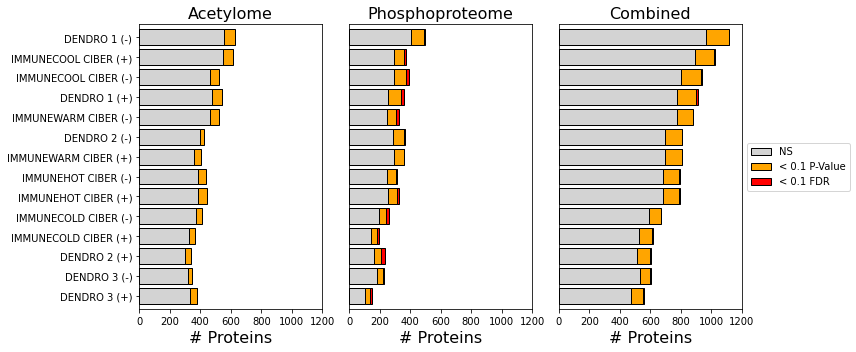

In [14]:
# ### Summary Figure
results_filt_df = results_df[results_df['id'].isin(to_plot)]

counts_df = results_filt_df.groupby(['id','clumpsptm_sampler']).size().reset_index().set_index(["id","clumpsptm_sampler"])
counts_df.columns = ['NS']

counts_pval_df = results_df[results_df['clumpsptm_pval']<0.1].groupby(['id','clumpsptm_sampler']).size().reset_index().set_index(["id","clumpsptm_sampler"])
counts_pval_df.columns = ['< 0.1 P-Value']

counts_fdr_df = results_df[results_df['fdr_corr']<0.1].groupby(['id','clumpsptm_sampler']).size().reset_index().set_index(["id","clumpsptm_sampler"])
counts_fdr_df.columns = ['< 0.1 FDR']

counts_df = counts_df.join(counts_pval_df).join(counts_fdr_df).fillna(0).astype(int).sort_values('NS')
counts_df = counts_df.reset_index()
counts_df = counts_df[~counts_df['id'].str.contains("dendro_4")]
#counts_df = counts_df[counts_df['id'].str.contains('positive') | counts_df['id'].str.contains('negative')].set_index(['id','clumpsptm_sampler'])

_counts_df = counts_df.reset_index()
_counts_df = _counts_df[_counts_df['clumpsptm_sampler']=='ptm'].set_index("id")
_order = _counts_df.sum(1).sort_values().index

### Summary Figure
## Create figure
fig,axes = plt.subplots(1,3,figsize=(12,5),sharey=False)

_counts_df = counts_df.reset_index()
_counts_df = _counts_df[_counts_df['clumpsptm_sampler']=='acetylome'].set_index("id").loc[_order][['NS', '< 0.1 P-Value', '< 0.1 FDR']]
_counts_df.plot(kind='barh', stacked=True, ax=axes[0], linewidth=1, width=0.8, edgecolor='black', color=['lightgrey','orange','red'])

_counts_df = counts_df.reset_index()
_counts_df = _counts_df[_counts_df['clumpsptm_sampler']=='phosphoproteome'].set_index("id").loc[_order][['NS', '< 0.1 P-Value', '< 0.1 FDR']]
_counts_df.plot(kind='barh', stacked=True, ax=axes[1], linewidth=1, width=0.8, edgecolor='black', color=['lightgrey','orange','red'])

_counts_df = counts_df.reset_index()
_counts_df = _counts_df[_counts_df['clumpsptm_sampler']=='ptm'].set_index("id").loc[_order][['NS', '< 0.1 P-Value', '< 0.1 FDR']]
_counts_df.plot(kind='barh', stacked=True, ax=axes[2], linewidth=1, width=0.8, edgecolor='black', color=['lightgrey','orange','red'])


axes[0].set_title("Acetylome", fontsize=16)
axes[0].set_ylabel("")
axes[0].set_xlabel("# Proteins", fontsize=16)
axes[0].legend().remove()

axes[1].set_title("Phosphoproteome", fontsize=16)
axes[1].set_ylabel("")
axes[1].set_xlabel("# Proteins", fontsize=16)
axes[1].legend().remove()
axes[1].set_yticks([])

axes[2].set_title("Combined", fontsize=16)
axes[2].set_ylabel("")
axes[2].set_xlabel("# Proteins", fontsize=16)
axes[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes[2].set_yticks([])

axes[0].set_yticklabels([x.get_text().replace("_", " ").upper().replace("POSITIVE","(+)").replace("NEGATIVE","(-)")  for x in axes[0].get_yticklabels()])
axes[0].set_xlim([0,1200])
axes[1].set_xlim([0,1200])
axes[2].set_xlim([0,1200])
plt.tight_layout()
plt.savefig("figures/clumpsptm_summary_figs2f.pdf", dpi=300, bbox_inches='tight')